<a href="https://colab.research.google.com/github/gstyanti/Regresi-Udemy-Course/blob/main/Regression_Finance_%26_Accounting_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mengimport Library apa saja yang digunakan

In [ ]:
import pandas as pd  # Untuk membaca dan memanipulasi data
import numpy as np  # Untuk operasi matematika dan statistik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.linear_model import LinearRegression  # Model regresi linier
from sklearn.metrics import mean_squared_error, r2_score  # Metrik evaluasi model
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import missingno as msno
from sklearn import preprocessing

#Mengimport Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Finance & Accounting Courses/udemy_output_All_Finance__Accounting_p1_p626.csv')

In [ ]:
# from google.colab import files
# upload = files.upload()
from google.colab import drive
drive.mount('/content/drive')

#1. Explorasi Dataset


## a. Eksplorasi Data


In [ ]:
# Mendefinisikan df sebagai variabel untuk menyimpan data csv
# df = pd.read_csv("udemy_output_All_Finance__Accounting_p1_p626.csv", encoding='latin1')

# Memanggil 25 data dari keseluruhan data
df.head(25)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
5,1208634,Microsoft Power BI - A Complete Introduction [...,/course/powerbi-complete-introduction/,True,124180,4.56228,4.57676,4.57676,38093,False,275,0,2017-05-08T13:03:21Z,2017-05-15T18:48:54Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
6,864146,Agile Crash Course: Agile Project Management; ...,/course/agile-crash-course/,True,96207,4.32383,4.29118,4.29118,30470,False,23,0,2016-05-30T22:57:40Z,2016-06-23T17:49:26Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
7,321410,Beginner to Pro in Excel: Financial Modeling a...,/course/beginner-to-pro-in-excel-financial-mod...,True,127680,4.54034,4.53346,4.53346,28665,False,275,0,2014-10-17T08:39:52Z,2014-11-25T23:00:40Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
8,673654,Become a Product Manager | Learn the Skills & ...,/course/become-a-product-manager-learn-the-ski...,True,112572,4.50386,4.50080,4.50080,27408,False,144,0,2015-11-18T19:35:12Z,2016-03-17T17:04:59Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
9,1653432,The Business Intelligence Analyst Course 2020,/course/the-business-intelligence-analyst-cour...,True,115269,4.50067,4.49575,4.49575,23906,False,413,0,2018-04-19T07:00:09Z,2018-04-25T18:40:55Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [ ]:
distribusi_iswishlist= df['is_wishlisted'].value_counts()
print(distribusi_iswishlist)

is_wishlisted
False    13608
Name: count, dtype: int64


In [ ]:
print ("Data Shape: ", df.shape)

Data Shape:  (13608, 20)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [ ]:
# Replace 'object_columns' with the actual column names
object_columns = ['created', 'published_time', 'discount_price__currency', 'discount_price__price_string', 'price_detail__currency', 'price_detail__price_string']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64

In [ ]:
# Mengganti data isnull dengan nilai lain
df['discount_price__amount'].fillna(0, inplace=True)
df['discount_price__currency'].fillna('N/A', inplace=True)
df['discount_price__price_string'].fillna('N/A', inplace=True)
df['price_detail__amount'].fillna(0, inplace=True)
df['price_detail__currency'].fillna('N/A', inplace=True)
df['price_detail__price_string'].fillna('N/A', inplace=True)

In [ ]:
df.isnull().sum()

id                              0
title                           0
url                             0
is_paid                         0
num_subscribers                 0
avg_rating                      0
avg_rating_recent               0
rating                          0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
published_time                  0
discount_price__amount          0
discount_price__currency        0
discount_price__price_string    0
price_detail__amount            0
price_detail__currency          0
price_detail__price_string      0
dtype: int64

In [ ]:
df.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,1.360800e+04,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000
mean,1.681721e+06,2847.010435,3.923293,3.912242,3.912242,243.169827,32.224794,0.110523,443.017637,4477.272193
std,9.539271e+05,9437.865634,1.031304,1.039237,1.039237,1580.965895,42.766911,0.623501,294.784921,3173.858399
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.580862e+05,62.000000,3.800000,3.787315,3.787315,7.000000,12.000000,0.000000,455.000000,1280.000000
50%,1.623421e+06,533.000000,4.194440,4.181735,4.181735,24.000000,21.000000,0.000000,455.000000,3200.000000
75%,2.503720e+06,2279.500000,4.450000,4.452105,4.452105,87.000000,37.000000,0.000000,455.000000,8640.000000
max,3.486006e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


## b. Visualisasi Data

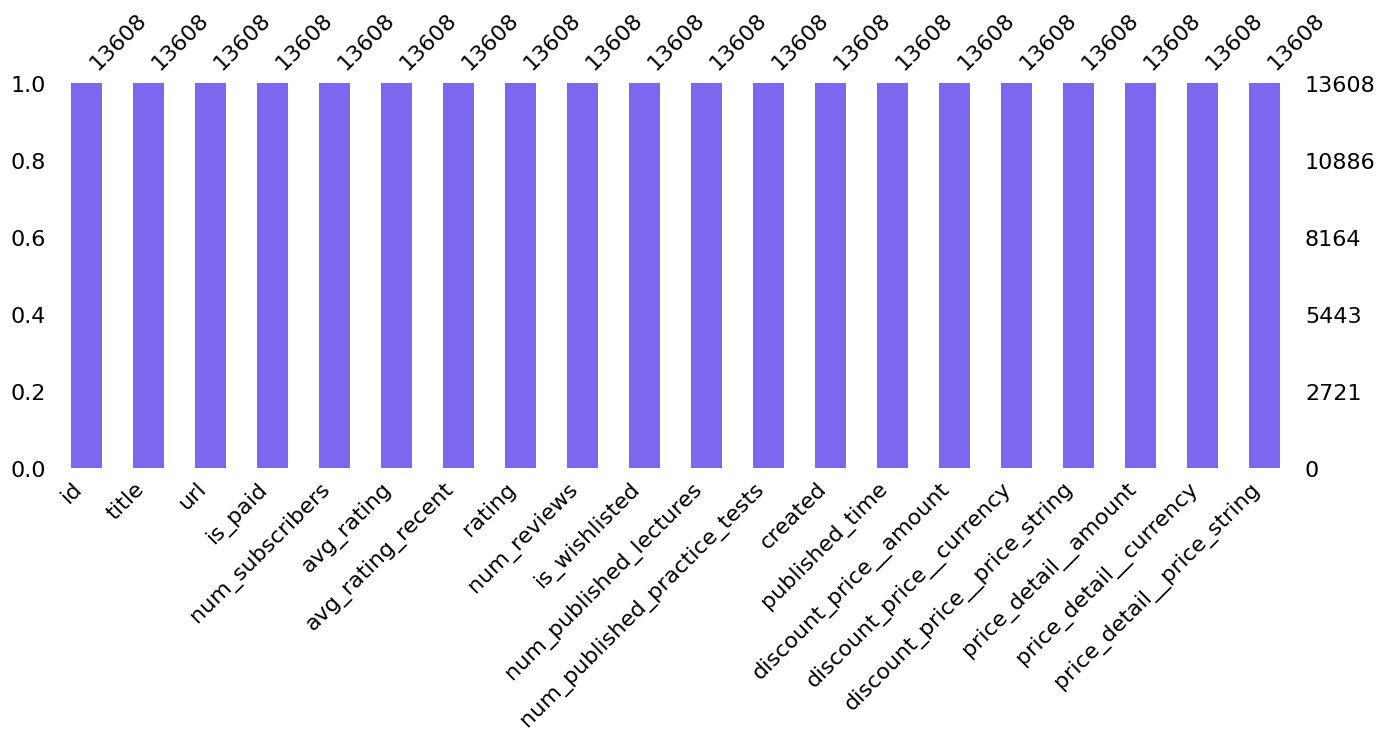

In [ ]:
msno.bar(df, figsize = (16,5),color = "#7B68EE")
plt.show()

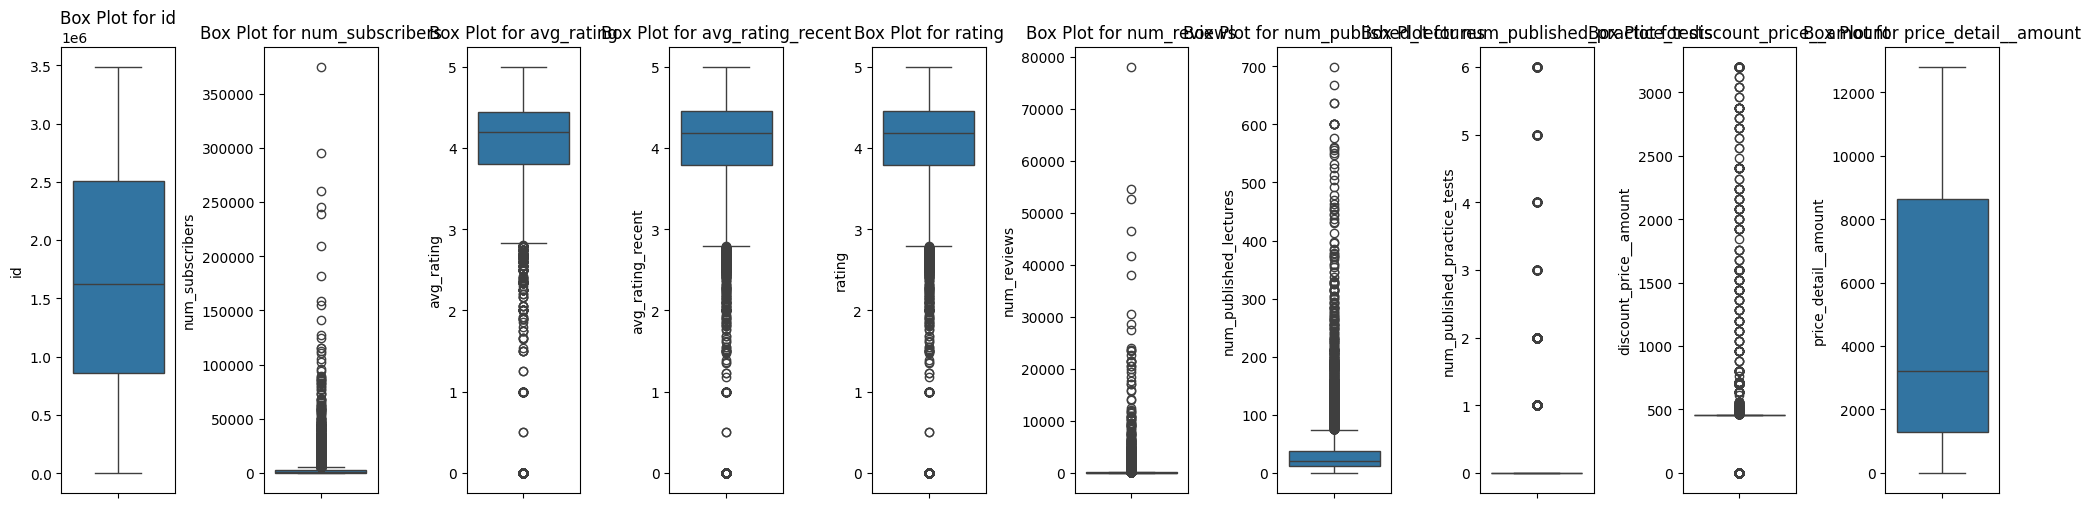

In [ ]:
#mengecek adanya outlier
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(20, 5))

for i, column in enumerate(numeric_columns):
  sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
  axs[i].set_title(f'Box Plot for {column}')
  axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

# 2. Pra-Pemrosesan Data

## a. Penanganan Data Kategorikal

In [ ]:
df.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string'],
      dtype='object')

In [ ]:
#mengubah data bool menjadi data numerik
# df['is_paid'] = df['is_paid'].replace({1: 'True', 0: 'False'})
# df['is_wishlisted'] = df['is_wishlisted'].replace({1: 'True', 0: 'False'})
df['is_paid'] = df['is_paid'].astype(int)
df['is_wishlisted'] = df['is_wishlisted'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  int64  
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  int64  
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [ ]:
df

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,1,295509,4.66019,4.67874,4.67874,78006,0,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,1,209070,4.58956,4.60015,4.60015,54581,0,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,1,155282,4.59491,4.59326,4.59326,52653,0,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,1,245860,4.54407,4.53772,4.53772,46447,0,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,1,374836,4.47080,4.47173,4.47173,41630,0,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,0,47,0.00000,0.00000,0.00000,0,0,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,0.0,N/A,N/A,0.0,N/A,N/A
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,0,19,0.00000,0.00000,0.00000,0,0,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,0.0,N/A,N/A,0.0,N/A,N/A
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,0,47,0.00000,0.00000,0.00000,0,0,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,0.0,N/A,N/A,0.0,N/A,N/A
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,0,48,0.00000,0.00000,0.00000,0,0,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,0.0,N/A,N/A,0.0,N/A,N/A


In [ ]:
le = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col.astype(str)))

In [ ]:
data_drop = df.drop(columns=['is_wishlisted'])

In [ ]:
df

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,12009,12360,1,295509,4.66019,4.67874,4.67874,78006,0,84,0,3016,2959,455.0,0,29,8640.0,0,33
1,937678,11543,11918,1,209070,4.58956,4.60015,4.60015,54581,0,78,0,3671,3403,455.0,0,29,8640.0,0,33
2,1361790,9186,9686,1,155282,4.59491,4.59326,4.59326,52653,0,292,2,5512,5429,455.0,0,29,8640.0,0,33
3,648826,11937,12288,1,245860,4.54407,4.53772,4.53772,46447,0,338,0,2543,2631,455.0,0,29,8640.0,0,33
4,637930,918,838,1,374836,4.47080,4.47173,4.47173,41630,0,83,0,2484,2594,455.0,0,29,8640.0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,13389,13,0,47,0.00000,0.00000,0.00000,0,0,6,0,12205,11926,0.0,1,0,0.0,1,0
13604,3467284,9839,6733,0,19,0.00000,0.00000,0.00000,0,0,5,0,13586,13562,0.0,1,0,0.0,1,0
13605,3368222,5381,5491,0,47,0.00000,0.00000,0.00000,0,0,5,0,13325,13177,0.0,1,0,0.0,1,0
13606,3211345,9490,9712,0,48,0.00000,0.00000,0.00000,0,0,13,0,12882,12995,0.0,1,0,0.0,1,0


## b. Normalisasi/Standarisasi

In [ ]:
# Scaling
## membantu meningkatkan performa model machine learning dan mempermudah interpretasi hasil model
scaler = StandardScaler().fit_transform(df)
scaled_df = pd.DataFrame(scaler, columns=df.columns)
scaled_df

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,-0.963531,1.336015,1.414483,0.194494,31.010480,0.714555,0.737586,0.737586,49.188719,0.0,1.210681,-0.177269,-0.964011,-0.978718,0.040649,-0.339047,0.297793,1.311615,-0.194697,1.273937
1,-0.780007,1.216939,1.301966,0.194494,21.851399,0.646067,0.661960,0.661960,34.371283,0.0,1.070381,-0.177269,-0.797261,-0.865669,0.040649,-0.339047,0.297793,1.311615,-0.194697,1.273937
2,-0.335395,0.614662,0.733780,0.194494,16.152020,0.651255,0.655330,0.655330,33.151731,0.0,6.074433,3.030541,-0.328579,-0.349823,0.040649,-0.339047,0.297793,1.311615,-0.194697,1.273937
3,-1.082822,1.317617,1.396154,0.194494,25.749669,0.601956,0.601885,0.601885,29.226138,0.0,7.150071,-0.177269,-1.084427,-1.062231,0.040649,-0.339047,0.297793,1.311615,-0.194697,1.273937
4,-1.094244,-1.498036,-1.518599,0.194494,39.415973,0.530907,0.538384,0.538384,26.179155,0.0,1.187298,-0.177269,-1.099447,-1.071652,0.040649,-0.339047,0.297793,1.311615,-0.194697,1.273937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,1.387670,1.688642,-1.728614,-5.141545,-0.296689,-3.804345,-3.764671,-3.764671,-0.153817,0.0,-0.613225,-0.177269,1.375323,1.304401,-1.502906,2.949443,-2.772586,-1.410724,5.136174,-1.258138
13604,1.871871,0.781521,-0.017947,-5.141545,-0.299656,-3.804345,-3.764671,-3.764671,-0.153817,0.0,-0.636609,-0.177269,1.726897,1.720948,-1.502906,2.949443,-2.772586,-1.410724,5.136174,-1.258138
13605,1.768021,-0.357619,-0.334115,-5.141545,-0.296689,-3.804345,-3.764671,-3.764671,-0.153817,0.0,-0.636609,-0.177269,1.660452,1.622922,-1.502906,2.949443,-2.772586,-1.410724,5.136174,-1.258138
13606,1.603561,0.692342,0.740398,-5.141545,-0.296583,-3.804345,-3.764671,-3.764671,-0.153817,0.0,-0.449541,-0.177269,1.547673,1.576583,-1.502906,2.949443,-2.772586,-1.410724,5.136174,-1.258138


## c. Pemilihan Fitur

In [ ]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mengurangi dimensi data
pca = PCA(n_components=10)  # Memilih 10 komponen utama
pca.fit(scaled_df)

# Menampilkan kontribusi tiap fitur dalam komponen utama
print("Komponen utama:")
print(pca.components_)

# Menjumlahkan kontribusi absolut dari tiap fitur dalam semua komponen utama
feature_importance = abs(pca.components_).sum(axis=0)

# Membuat DataFrame untuk mempermudah interpretasi
importance_df = pd.DataFrame({
    'feature': df.columns,
    'importance': feature_importance
})

# Mengurutkan fitur berdasarkan pentingnya
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Menampilkan 10 fitur teratas
print("\n10 fitur terbaik:")
print(importance_df.head(10))

Komponen utama:
[[-2.87398563e-01  4.63463934e-02  5.50468513e-02  2.94880784e-01
   1.01059542e-01  2.80056206e-01  2.76462262e-01  2.76462262e-01
   9.90036516e-02  1.69406589e-21  1.31270855e-01 -5.87846163e-02
  -2.85822496e-01 -2.82308980e-01  1.87900897e-01 -2.93780759e-01
   2.81014010e-01  2.22312090e-01 -2.95452309e-01  2.33628406e-01]
 [-2.49493063e-01  2.46203489e-02  1.89758310e-02 -3.37255509e-01
   1.02254072e-01  2.94817976e-01  2.97580189e-01  2.97580189e-01
   8.14847704e-02 -5.42101086e-20  1.06208751e-02 -8.38016436e-02
  -2.49052580e-01 -2.49066106e-01 -2.27474831e-01  3.35053097e-01
  -3.18296931e-01 -1.22651820e-01  3.36903326e-01 -1.29854478e-01]
 [-4.18136490e-01 -2.06329917e-02 -2.62731787e-02  5.41123804e-02
  -1.98436275e-02 -3.49741788e-01 -3.54064282e-01 -3.54064282e-01
  -1.62627116e-02  0.00000000e+00 -1.04685349e-01 -3.57954701e-02
  -4.20424265e-01 -4.19327652e-01 -4.95521355e-02 -2.82326737e-02
   3.64025597e-02 -1.93927284e-01 -5.36548990e-02 -1.93701

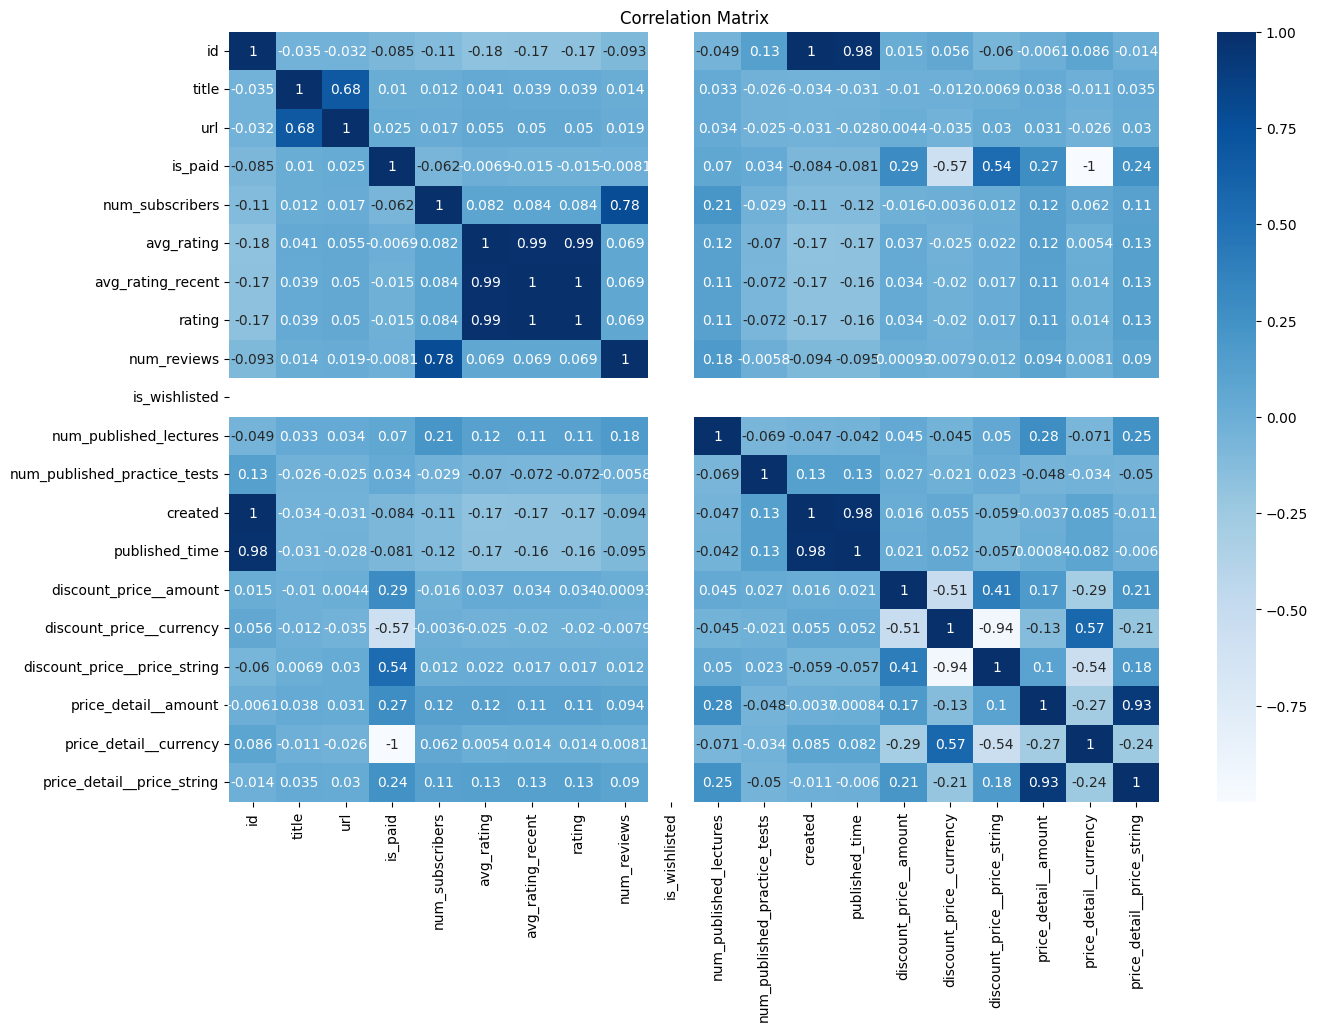

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt=".2g")
plt.title('Correlation Matrix')
plt.show()

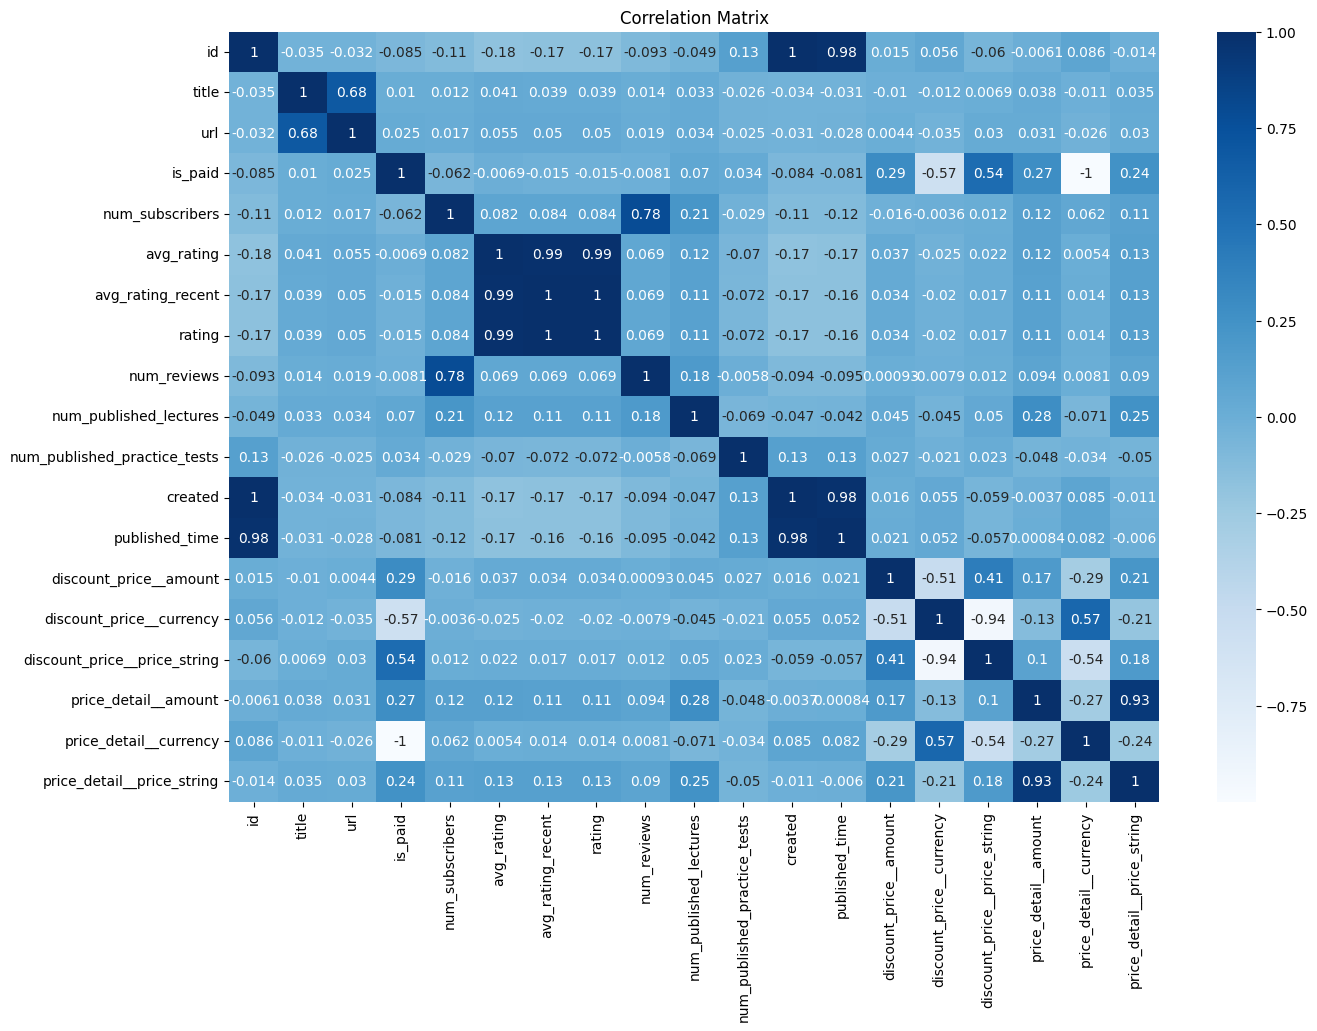

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_drop.corr(), cmap='Blues', annot=True, fmt=".2g")
plt.title('Correlation Matrix')
plt.show()

# 3. Pembagian Data

##Pembagian Dataset

In [ ]:
X = df.drop(columns=['is_wishlisted'])  # Misalnya 'is_wishlisted' adalah label
y = df['is_wishlisted']

In [ ]:
# Membagi dataset menjadi set pelatihan dan set pengujian dengan perbandingan 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##Distribusi Kelas


In [ ]:
# Memastikan distribusi kelas terjaga di kedua set
print('Distribusi kelas di set pelatihan:')
print(y_train.value_counts(normalize=True))
print('Distribusi kelas di set pengujian:')
print(y_test.value_counts(normalize=True))

Distribusi kelas di set pelatihan:
is_wishlisted
0    1.0
Name: proportion, dtype: float64
Distribusi kelas di set pengujian:
is_wishlisted
0    1.0
Name: proportion, dtype: float64


# 4. Pemodelan

In [ ]:
# Standarisasi fitur numerik
numeric_columns = X.select_dtypes(include=['int', 'float']).columns
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [ ]:
# Label encoding untuk fitur kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

##Logistic Regresi dan Random Forest

In [ ]:
# Model Linear Regression
lr_model = LinearRegression()

# Model Random Forest
rf_model = RandomForestRegressor()

##Melatih Model dengan Set Pelatihan

In [ ]:
# Latih model menggunakan set pelatihan
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor()

##Metriks Evaluasi

In [ ]:
# Evaluasi kinerja model menggunakan set pengujian
# Untuk Linear Regression
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

# Untuk Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

In [ ]:
# Menampilkan hasil evaluasi
print("Linear Regression:")
print(f"MSE: {lr_mse}")
print(f"R^2: {lr_r2}")

print("\nRandom Forest:")
print(f"MSE: {rf_mse}")
print(f"R^2: {rf_r2}")

Linear Regression:
MSE: 0.0
R^2: 1.0

Random Forest:
MSE: 0.0
R^2: 1.0


# 5. Optimasi Model

##Persiapan Data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Memuat dataset iris
from sklearn.datasets import load_iris
iris = load_iris()

# Memisahkan fitur dan target
X = iris.data
y = iris.target

# Membagi dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##Hiperparameter Tuning


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)


Best parameters for Logistic Regression: {'C': 1, 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
#Evaluasi Model
from sklearn.metrics import accuracy_score

# Evaluasi Logistic Regression
y_pred_lr = best_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression:", accuracy_lr)

#lanjutkan dengan Random Forest dan SVM.
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluasi Random Forest
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)

# SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_
print("Best parameters for SVM:", grid_search_svm.best_params_)

# Evaluasi SVM
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM:", accuracy_svm)



Accuracy of Logistic Regression: 1.0
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Accuracy of Random Forest: 1.0
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Accuracy of SVM: 1.0


# 6. Analisis Hasil

In [ ]:
# Akurasi dari setiap model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of Random Forest:", accuracy_rf)
print("Accuracy of SVM:", accuracy_svm)


Accuracy of Logistic Regression: 1.0
Accuracy of Random Forest: 1.0
Accuracy of SVM: 1.0


In [ ]:
import numpy as np

# Pentingnya fitur dari Random Forest
feature_importances_rf = best_rf.feature_importances_
features = iris.feature_names

# Koefisien dari Logistic Regression
coefficients_lr = best_lr.coef_

# Menampilkan pentingnya fitur
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance (Random Forest)': feature_importances_rf,
    'Coefficient (Logistic Regression)': np.mean(coefficients_lr, axis=0)  # rata-rata koefisien untuk setiap kelas
})

print(feature_importance_df)


             Feature  Importance (Random Forest)  \
0  sepal length (cm)                    0.086061   
1   sepal width (cm)                    0.038837   
2  petal length (cm)                    0.463458   
3   petal width (cm)                    0.411644   

   Coefficient (Logistic Regression)  
0                       5.255056e-15  
1                      -2.294461e-15  
2                      -2.960595e-16  
3                      -8.141636e-16  


Interpretasi Model
Interpretasi model penting untuk memahami bagaimana model membuat prediksi. Berikut adalah beberapa poin untuk setiap model:

Logistic Regression:

Model ini memberikan koefisien yang menunjukkan hubungan linear antara fitur dan probabilitas kelas.
Koefisien positif menunjukkan bahwa peningkatan nilai fitur akan meningkatkan probabilitas kelas tertentu.
Random Forest:

Model ini memberikan pentingnya fitur yang menunjukkan seberapa besar pengaruh setiap fitur dalam membuat prediksi.
Bisa digunakan untuk mengidentifikasi fitur mana yang paling penting dan mana yang bisa diabaikan.
SVM:

Meskipun SVM lebih sulit untuk diinterpretasikan secara langsung dibandingkan Logistic Regression, kita bisa menggunakan teknik seperti Support Vectors untuk memahami keputusan batas yang dibuat oleh model.